In [84]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Loading the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [87]:
# Inspecting the data
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [88]:
# Checking for missing values
print(df.isna().sum())
print('----------')
print(df.isnull().sum())
print('----------')
print(df.info())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
----------
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None


In [89]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## Initial Assessment
* There are no missing or null values in the DataFrame
* The DataFrame has 7560 rows and 6 columns.

In [90]:
# Data Wrangling
# Converting the date field to a datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
print(df['Date'].dtype)
print(df.info())

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB
None


In [91]:
# Checking the time, state, group fields for unique items
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


In [92]:
# Data seems mostly clean. Just have a leading space on each entry which we can remove
df['Time'] = df['Time'].str.strip()
print(df['Time'].unique())

df['State'] = df['State'].str.strip()
print(df['State'].unique())

df['Group'] = df['Group'].str.strip()
print(df['Group'].unique())

['Morning' 'Afternoon' 'Evening']
['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
['Kids' 'Men' 'Women' 'Seniors']


In [93]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


Descriptive Unit Statistics
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64
----------
Descriptive Sales Statistics
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64


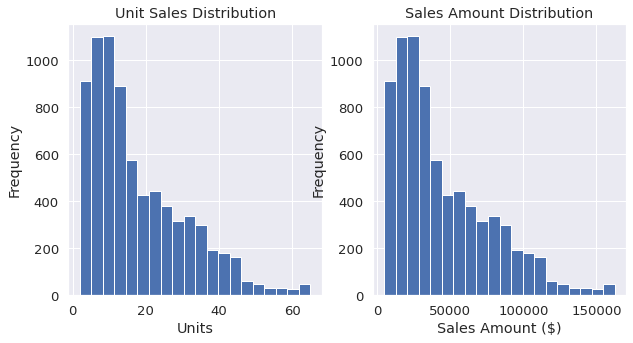

In [94]:
#  Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.
print('Descriptive Unit Statistics')
print(df['Unit'].describe())
print('----------')
print('Descriptive Sales Statistics')
print(df['Sales'].describe())

# Plotting histograms from Unit and Sales
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Unit'], bins=20)
plt.title('Unit Sales Distribution')
plt.xlabel('Units')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Sales'], bins=20)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.show()

## Data Analyis - Units
* There is a moderate amount of variability.
* There is a wide range of sales volumes.
* The distribution of unit sales appears to be skewed, with a longer tail on the right side (towards higher sales).
## Data Analysis - Sales
* There is a significant amount of variability in sales.
* There is a wide range of sales amounts.
## Data Analysis - Comparison
* The skewness of the sales distribution is more pronounced than the skewness of the unit distribution, suggesting that there are more extreme sales amounts.

Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64
-----
Group with highest sales: Men with $85750000
Group with lowest sales: Seniors with $84037500


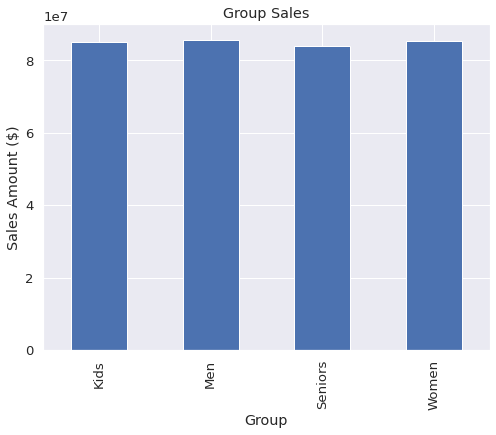

In [95]:
# Group Analysis
group_sales = df.groupby('Group')['Sales'].sum()
print(group_sales)
print('-----')

# Highest
max_sales_group = group_sales.idxmax()
max_sales_amount = group_sales.max()
print(f"Group with highest sales: {max_sales_group} with ${max_sales_amount}")

# Lowest
min_sales_group = group_sales.idxmin()
min_sales_amount = group_sales.min()
print(f"Group with lowest sales: {min_sales_group} with ${min_sales_amount}")

# Plot bar chart for group sales
plt.figure(figsize=(8, 6))
group_sales.plot(kind='bar')
plt.title('Group Sales')
plt.xlabel('Group')
plt.ylabel('Sales Amount ($)')
plt.show()

## Data Analysis - Groups
* Men have the highest sales
* Seniors have the lowest sales
* Sales amounts are relatively close

Weekly Sales Report:
Week
40    15045000
41    27002500
42    26640000
43    26815000
44    21807500
45    20865000
46    21172500
47    21112500
48    21477500
49    29622500
50    31525000
51    31655000
52    31770000
53    13792500
Name: Sales, dtype: int64

Monthly Sales Report:
Month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

Quarterly Sales Report:
Quarter
4    340302500
Name: Sales, dtype: int64


([<matplotlib.axis.XTick at 0x7f3b2fb94490>,
 [Text(10, 0, '10'), Text(11, 0, '11'), Text(12, 0, '12')])

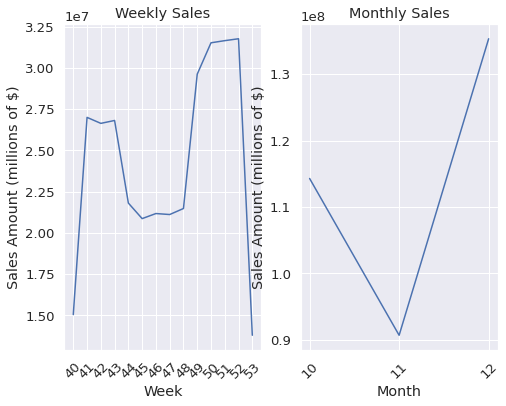

In [96]:
# Data Analysis by datetime
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Calculate total sales by week
weekly_sales = df.groupby('Week')['Sales'].sum()

# Calculate total sales by month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Calculate total sales by quarter
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

# Print the results
print("Weekly Sales Report:")
print(weekly_sales)

print("\nMonthly Sales Report:")
print(monthly_sales)

print("\nQuarterly Sales Report:")
print(quarterly_sales)

# Plot line charts for weekly and monthly sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
weekly_sales.plot(kind='line')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales Amount (millions of $)')
ticks = range(weekly_sales.index.min(), weekly_sales.index.max() + 1)
plt.xticks(ticks, ticks, rotation=45)

plt.subplot(1, 3, 2)
monthly_sales.plot(kind='line')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount (millions of $)')
ticks = range(monthly_sales.index.min(), monthly_sales.index.max() + 1)
plt.xticks(ticks, ticks, rotation=45)

## Data Analysis by date
* The sales data shows a general increasing trend, with some fluctuations throughout the weeks and months.
* The peak sales period is towards the end of the year.

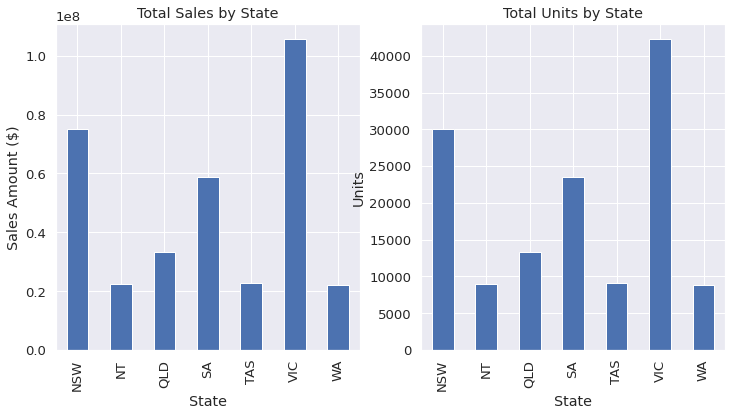

<Figure size 720x432 with 0 Axes>

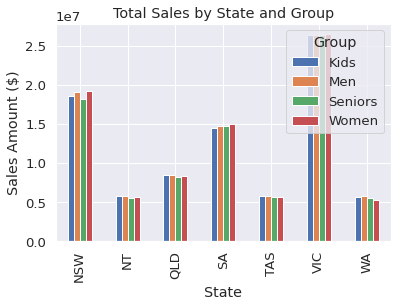

Total Sales by State:
State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64

Total Units by State:
State
NSW    29988
NT      9032
QLD    13367
SA     23543
TAS     9104
VIC    42226
WA      8861
Name: Unit, dtype: int64

Total Sales by State and Group:
Group      Kids       Men   Seniors     Women
State                                        
NSW    18587500  19022500  18187500  19172500
NT      5700000   5762500   5465000   5652500
QLD     8510000   8392500   8190000   8325000
SA     14515000  14655000  14717500  14970000
TAS     5775000   5757500   5650000   5577500
VIC    26360000  26407500  26315000  26482500
WA      5625000   5752500   5512500   5262500


In [97]:
# Using the State field
# Calculate total sales by state
state_sales = df.groupby('State')['Sales'].sum()

# Calculate total units by state
state_units = df.groupby('State')['Unit'].sum()

# Calculate total sales by state and group
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()

# Plot bar charts for total sales and units by state
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
state_sales.plot(kind='bar')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Sales Amount ($)')

plt.subplot(1, 2, 2)
state_units.plot(kind='bar')
plt.title('Total Units by State')
plt.xlabel('State')
plt.ylabel('Units')
plt.show()

# Plot heatmaps for total sales by state and group
plt.figure(figsize=(10, 6))
state_group_sales.plot(kind='bar')
plt.title('Total Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Sales Amount ($)')
plt.legend(title='Group')
plt.show()

# Print the results
print("Total Sales by State:")
print(state_sales)
print("\nTotal Units by State:")
print(state_units)
print("\nTotal Sales by State and Group:")
print(state_group_sales)

## Data Analysis by State
* VIC is the state with the highest total sales and units
* NSW and SA are also strong performers, with high total sales and units.
* NT and TAS have lower total sales and units.
* The Women group is the strongest performer in terms of total sales across most states, followed by the Men and Kids groups.

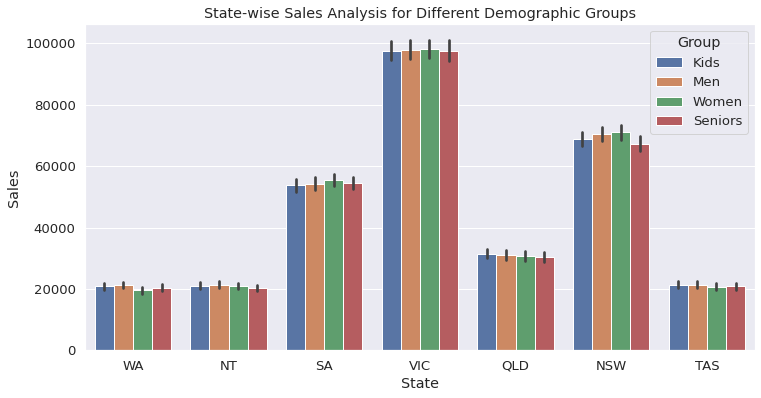

In [98]:
# Data Visualization Dashboard
import seaborn as sns
import matplotlib.pyplot as plt

# State-wise sales analysis for different demographic groups
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

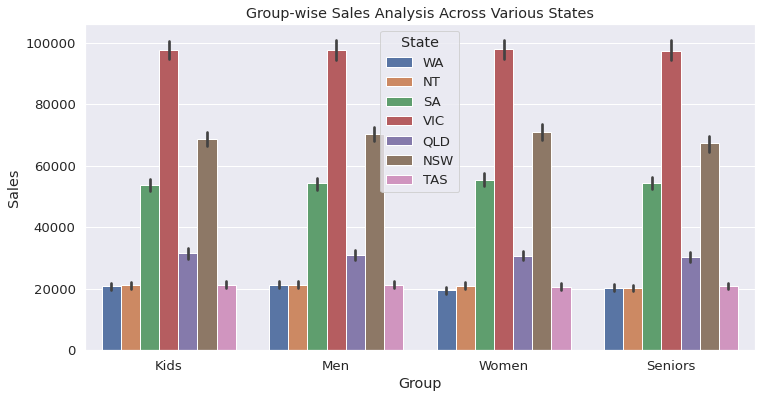

In [99]:
# Group-wise sales analysis across various states
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.title('Group-wise Sales Analysis Across Various States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.show()

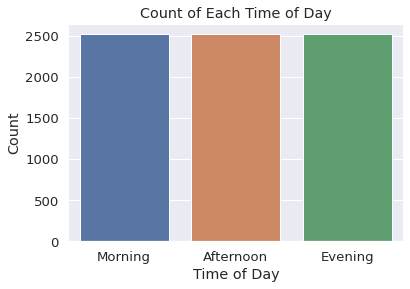

In [100]:
# Time-of-the-day analysis
# Count the number of each time of day
time_of_day_counts = df['Time'].value_counts()

# Create a bar chart
sns.countplot(x='Time', data=df)
plt.title('Count of Each Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

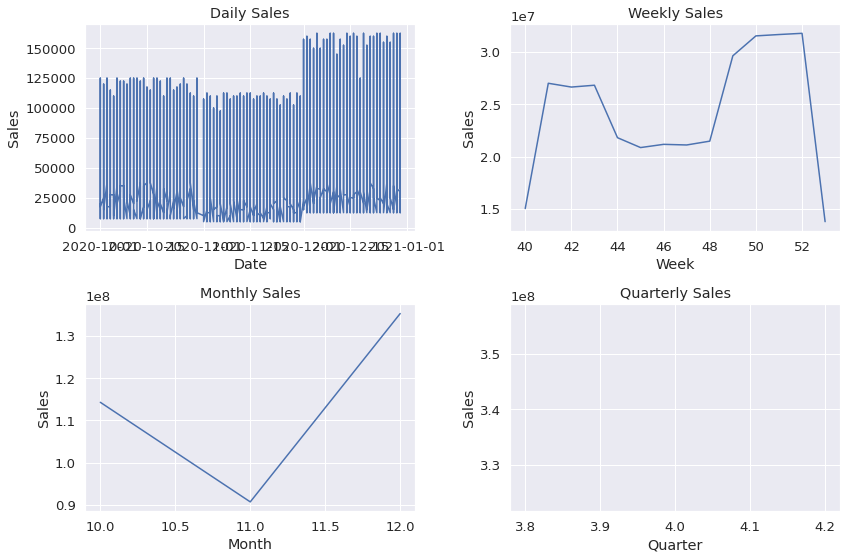

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Daily sales
axs[0, 0].plot(df['Date'], df['Sales'])
axs[0, 0].set_title('Daily Sales')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sales')

# Weekly sales
weekly_sales = df.groupby('Week')['Sales'].sum()
axs[0, 1].plot(weekly_sales.index, weekly_sales.values)
axs[0, 1].set_title('Weekly Sales')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Sales')

# Monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum()
axs[1, 0].plot(monthly_sales.index, monthly_sales.values)
axs[1, 0].set_title('Monthly Sales')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Sales')

# Quarterly sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum()
axs[1, 1].plot(quarterly_sales.index, quarterly_sales.values)
axs[1, 1].set_title('Quarterly Sales')
axs[1, 1].set_xlabel('Quarter')
axs[1, 1].set_ylabel('Sales')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()